## اضافه کردن کتابخانه‌های مورد نیاز

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import joblib

## داده
- داده استفاده شده در این سوال در فایل `data.csv` در کنار همین نوت‌بوک قرار داده شده است.
برای اینکه نتایج برای همه یکسان و قابل داوری باشد لازم است تا چند نکته را رعایت کنید.
- برای تبدیل مقادیر ستون `diagnosis` به عدد، 0 را معادل `B` و 1 را معادل `M` ذر نظر بگیرید.
- هنگام تقسیم داده به دو قسمت آموزش و آزمون `test_size=0.2` و `random_state=45` و `stratify=y` قرار دهید تا اندازه و مقادیر داده تست یکسان باشد.

In [3]:
df=pd.read_csv('data.csv')

In [4]:
X = df[['compactness_mean','radius_mean']]
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
y=df[['diagnosis']]
x_train,x_test,y_train,y_test=train_test_split(X,y.values.ravel(),test_size=0.2,stratify=y,random_state=45)

تعدادی مدل `KNN` با ۲ تا ۱۰ همسایگی روی داده‌های آموزشی برازش کنید و هرکدام که `accuracy_score` بالاتری روی داده‌های آزمون داشت، به عنوان مدل نهایی انتخاب کنید.

In [5]:
K=[2,3,4,5,6,7,8,9,10]
acc=[]
for k in K:
    knn=KNeighborsClassifier(n_neighbors=k)
    clf=knn.fit(x_train,y_train)
    y_predict=knn.predict(x_test)
    acc.append(accuracy_score(y_test,y_predict))
best_acc=max(acc)
i=acc.index(best_acc)
best_k=K[i]

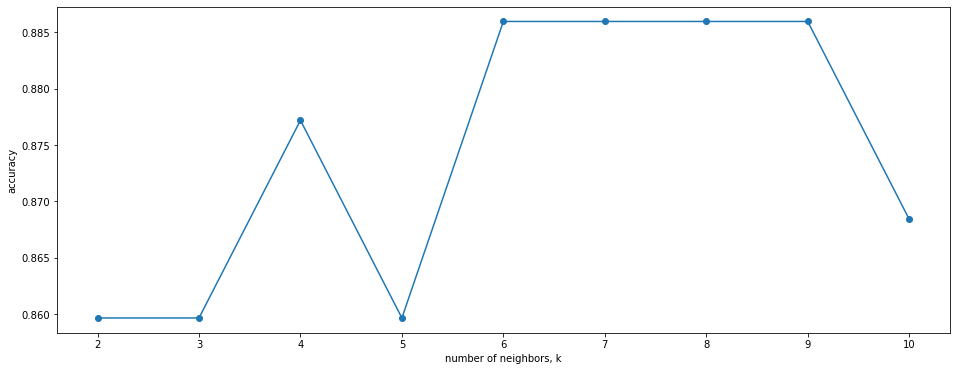

In [6]:
plt.figure(figsize = (16,6))
plt.plot(K, acc, '-o')
plt.xlabel('number of neighbors, k')
plt.ylabel('accuracy')
plt.xticks(K)
plt.show()

In [7]:
final_model=KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

ماژول `joblib` به منظور ذخیره و لود کردن مدل‌های یادگیری ماشین در فایل استفاده می‌شود.

به این شکل می‌توانید مدل نهایی خود را فایل `model.pkl` ذخیره کنید.

In [8]:
joblib.dump(final_model,'model.pkl')

['model.pkl']

##### ابتدا نوت‌بوک را ذخیره و سپس گزینه‌ی ارسال پاسخ را انتخاب کنید تا مدل به همراه این نوت‌بوک ارسال شود.